In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [19]:
ds=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

# Initial Dataset

In [20]:
ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
ds.shape,ds.columns

((8807, 12),
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
        'release_year', 'rating', 'duration', 'listed_in', 'description'],
       dtype='object'))

In [22]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


# Checking The NULL VALUES

In [23]:
ds.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [24]:
ds[ds['director'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


# Data Cleaning and Preprocessing¶
We will clean the dataset by handling missing values and formatting data for analysis:

Replace missing values in cast, country, etc. with mode

In [25]:
ds['director']=ds['director'].fillna('Unknown')

In [26]:
ds.isna().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

# Filling the missing data with their modes : By using the Append mode 'a'

In [27]:
for a in ['cast','country','date_added','rating','duration']:
    ds[a] = ds[a].fillna(ds[a].mode()[0])

In [28]:
print(f"Rows: {ds.shape[0]}, Columns: {ds.shape[1]}")
print("\nColumn Data Types:\n", ds.dtypes)
print("\nMissing Values:\n", ds.isna().sum())
print("\n Description for the dataset:\n",ds.describe())

Rows: 8807, Columns: 12

Column Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

 Description for the dataset:
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [29]:
ds['director'].nunique()

4529

In [30]:
ds['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

# Exploratory Data Analysis (EDA)
Let's analyze key aspects of the data like:

*Movies vs Tv Shows
*Top ten Directors
*Most Frequent Genres



# Total number of Movies vs TV Shows

In [31]:
type_counts = ds['type'].value_counts()
print("Classification:\n", type_counts)

Classification:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## Bar Chart for the Movies vs TV show count

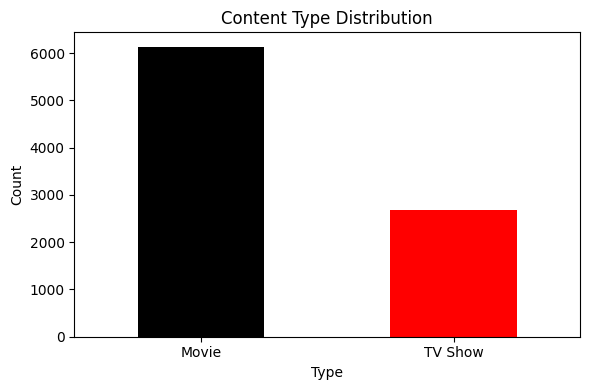

In [32]:

type_counts = ds['type'].value_counts()

plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar', color=['#000000', '#FF0000'])
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
top_countries = ds['country'].value_counts().head(10)
print("Top 10 Countries by Number of Titles:\n", top_countries)

Top 10 Countries by Number of Titles:
 country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


# Top Ten Directors Describing with Barchart

In [34]:
top_directors = ds[ds['director'] != 'Unknown']['director'].value_counts().head(10)
print("Top 10 Directors:\n", top_directors)

Top 10 Directors:
 director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


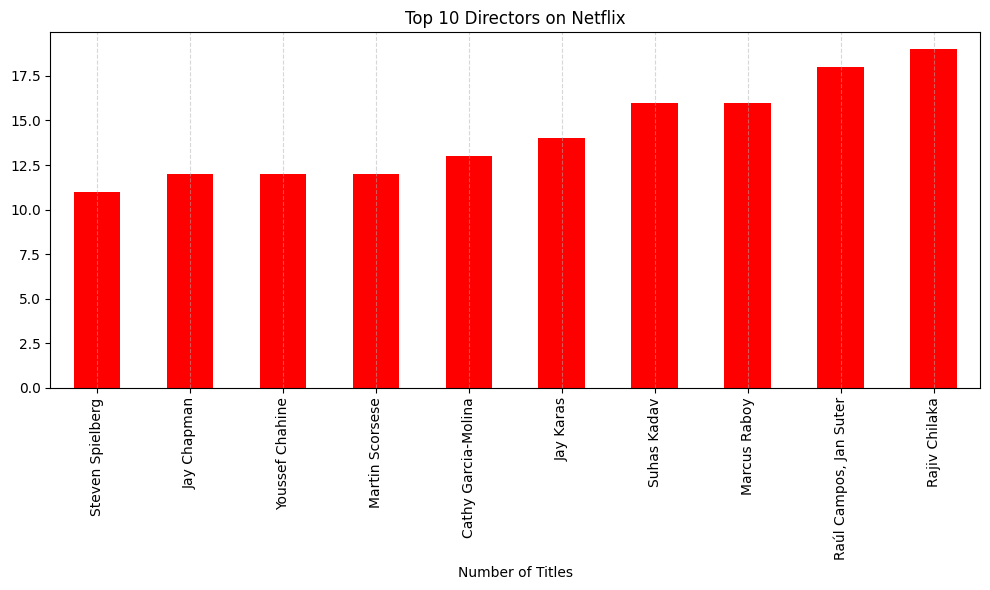

In [35]:
import matplotlib.pyplot as plt

top_directors = ds[ds['director'] != 'Unknown']['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='#FF0000')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_xaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# The most frequent genre in Netflix

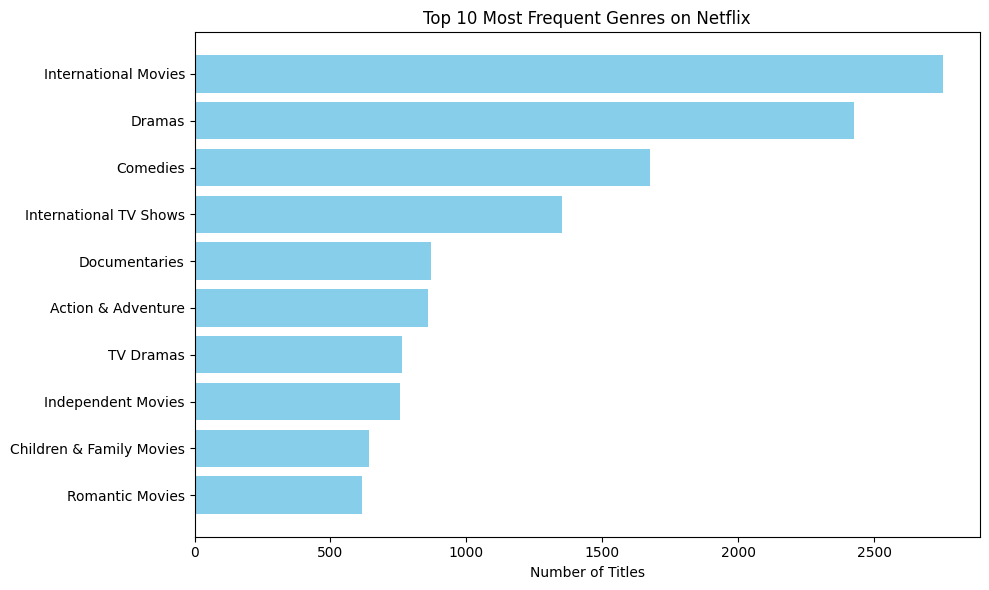

In [36]:

import matplotlib.pyplot as plt
from collections import Counter

all_genres = ds['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(flat_genres)
top_genres = genre_counts.most_common(10)

# Prepare data for plotting
genres, counts = zip(*top_genres)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(genres[::-1], counts[::-1], color='skyblue')  
plt.xlabel("Number of Titles")
plt.title("Top 10 Most Frequent Genres on Netflix")
plt.tight_layout()
plt.show()

# Top 10 Countries 

In [37]:
top_countries = ds['country'].value_counts().head(10)
print("Top 10 Countries by Number of Titles:\n", top_countries)

Top 10 Countries by Number of Titles:
 country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [38]:
language_proxy = ds['country'].str.split(', ').explode().value_counts().head(10)
print("Top 10 Content-Producing Countries:\n",language_proxy)

Top 10 Content-Producing Countries:
 country
United States     4520
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


# The ratings distributions by Type

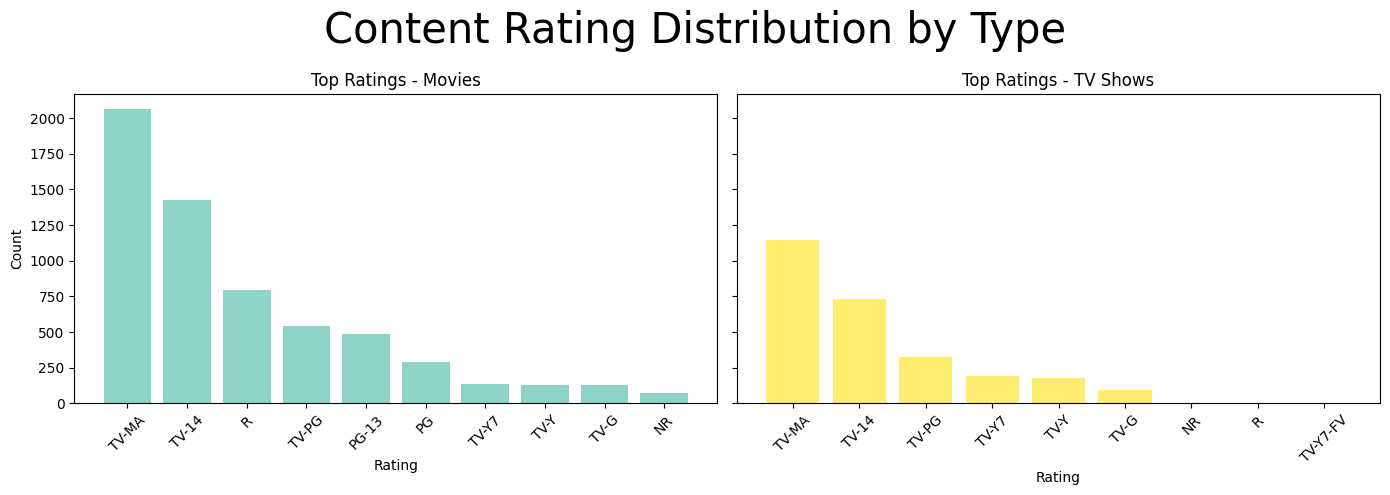

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for i, t in enumerate(['Movie', 'TV Show']):
    ds_type = ds[ds['type'] == t]
    rating_counts = ds_type['rating'].value_counts().head(10)
    axs[i].bar(rating_counts.index, rating_counts.values, color=plt.cm.Set3(i * 30))
    axs[i].set_title(f'Top Ratings - {t}s')
    axs[i].set_xlabel('Rating')
    axs[i].tick_params(axis='x', rotation=45)

axs[0].set_ylabel('Count')
fig.suptitle('Content Rating Distribution by Type', fontsize=30)
plt.tight_layout()
plt.show()

# Conclusion
    This analysis reveals that Netflix content and the ratings given are highly focusing on the Movies especially for the Dramatic genres.This insight can help the content creators to choose and understand market trends and viewers discover popular genres , directors and the Countries 